In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Step 1 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117886/'>link</a>
<br>В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:

'df has y rows and x columns'

где y — число строк, а x — число колонок.

In [3]:
df = pd.DataFrame({'c1':[1,2,3,4,5], 'c2':['a','b','c','d','e']})

In [4]:
shape = df.shape
df_shape = f'df has {shape[0]} rows and {shape[1]} columns'

In [5]:
df_shape

'df has 5 rows and 2 columns'

Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117887/'>link</a>
<br>Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит.

In [25]:
df = pd.DataFrame({'c1':[1,2,3,4,5],
                   'c2':['a', np.nan,'c','d','e'],
                   'c3':[3,np.nan,3,4,np.nan],
                   'age':['1','2','3','4','5']})

In [15]:
na_number = df.isna().sum()

In [21]:
df.age = df.age.astype('int')

In [24]:
df.drop(['age','c3'], axis=1)

,c1,c2
0,1,a
1,2,NaN
2,3,c
3,4,d
4,5,e


In [28]:
df.drop_duplicates('c3')

,c1,c2,c3,age
0,1,a,3.0,1
1,2,NaN,NaN,2
3,4,d,4.0,4


In [29]:
numbers = [1, -2, 3, 0, -3, 2]

In [30]:
positive_numbers = []
for i in numbers:
    if i == 0:
        break
    
    if i > 0:
        positive_numbers.append(i)

In [31]:
positive_numbers

[1, 3]

Step 8 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117893/'>link</a>
<br>Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.

Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [32]:
path_to_file = '../../3_pandas_and_visualization/lesson_3/3_taxi_peru.csv'

In [44]:
taxi = pd.read_csv(path_to_file, sep=';')

In [53]:
taxi.head(1)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0


In [36]:
taxi[['start_at', 'end_at', 'arrived_at']].head()

,start_at,end_at,arrived_at
0,2010-11-16 16:44:00,2010-11-16 17:29:00,2010-11-16 17:02:00
1,2010-06-01 00:34:00,2010-06-01 00:37:00,NaN
2,2010-05-31 05:01:00,2010-05-31 05:04:00,NaN
3,2010-06-01 00:29:00,2010-06-01 00:32:00,NaN
4,2010-09-11 23:55:00,2010-09-12 01:07:00,2010-09-11 23:50:00


In [39]:
#taxi.start_at = pd.to_datetime(taxi.start_at)
#taxi.end_at = pd.to_datetime(taxi.end_at)
#taxi.arrived_at = pd.to_datetime(taxi.arrived_at)

In [45]:
to_dt_lst = ['start_at', 'end_at', 'arrived_at']
for c in to_dt_lst:
    taxi[c] = pd.to_datetime(taxi[c])

In [46]:
taxi[['start_at', 'end_at', 'arrived_at']].head()

,start_at,end_at,arrived_at
0,2010-11-16 16:44:00,2010-11-16 17:29:00,2010-11-16 17:02:00
1,2010-06-01 00:34:00,2010-06-01 00:37:00,NaT
2,2010-05-31 05:01:00,2010-05-31 05:04:00,NaT
3,2010-06-01 00:29:00,2010-06-01 00:32:00,NaT
4,2010-09-11 23:55:00,2010-09-12 01:07:00,2010-09-11 23:50:00


In [42]:
status = ['asap', 'reserved']
taxi = taxi.query('start_type in @status')

Step 9 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117894/'>link</a>
<br>⭐️Задание со звёздочкой!⭐️

Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.

Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]').

In [50]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [52]:
taxi.wait_time.head()

0    18.0
1     NaN
2     NaN
3     NaN
4    -5.0
Name: wait_time, dtype: float64

Step 10 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117895/'>link</a>
<br>⭐️Задание со звёздочкой!⭐️

Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.

Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [82]:
late_df = taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .groupby(by='driver_id', as_index = False) \
    .agg({'journey_id':'count'}) \
    .rename(columns={'journey_id':'late_count'}) \
    .sort_values('late_count', ascending = False)

late_df.head()

,driver_id,late_count
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45


Step 11 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117896/'>link</a>
<br>Подумайте, что может влиять на число опозданий из прошлого задания 🤔

In [62]:
taxi['is_late'] = taxi.wait_time > 0.0

In [85]:
rider_score_mean = taxi.query('start_type == "reserved"') \
    .groupby(by='driver_id', as_index = False) \
    .agg({'rider_score':'mean'}) \
    .rename(columns={'rider_score':'rider_score_mean'}) \
    .sort_values('rider_score_mean', ascending = False)

In [86]:
journey_count = taxi.query('start_type == "reserved"') \
    .groupby(by='driver_id', as_index = False) \
    .agg({'journey_id':'count'}) \
    .rename(columns={'journey_id':'journey_count'}) \
    .sort_values('journey_count', ascending = False)

In [88]:
late_df.merge(rider_score_mean, on='driver_id').merge(journey_count, on='driver_id')

,driver_id,late_count,rider_score_mean,journey_count
0,406921adcca37705ef527b4246c0cfea,67,4.909091,363
1,d665fb9f75ef5d9cd0fd89479380ba78,59,4.962555,579
2,ec84a73745199ff840ecafcb924383ad,57,4.962406,330
3,56f59b58bcbbd1cdabc3652e713134c2,51,4.150000,130
4,c814db2127582cf95dea1f74f43127c2,45,4.966102,385
...,...,...,...,...
100,d7bf644eb441cda6127f91addebb85c4,1,NaN,4
101,b68895736389f2949faa8c73555b81ac,1,4.545455,15
102,8cb98e46b27af1e6fca8768a2a6329f3,1,4.666667,18
103,389bfa333ba8fa7281dd5f0e1b57c0c1,1,NaN,4


Step 12 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117897/'>link</a>
<br>⭐️Задание со звёздочкой!⭐️

Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели. 

Полезные ссылки:

как извлечь нужное значение из даты?
.dt.strftime('%A') – извлечь день недели в формате названия (подробнее о strftime здесь)
Данные загружены в taxi и отфильтрованы, как в 8 шаге.

In [99]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.day_name()

In [100]:
taxi[['month', 'weekday']]

,month,weekday
0,11,Tuesday
1,6,Tuesday
2,5,Monday
3,6,Tuesday
4,9,Saturday
...,...,...
23106,7,Saturday
23107,10,Saturday
23108,9,Tuesday
23109,4,Thursday


Step 13 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117898/'>link</a>
<br>⭐️Задание со звёздочкой!⭐️

Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 

Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

<AxesSubplot:xlabel='month', ylabel='count'>

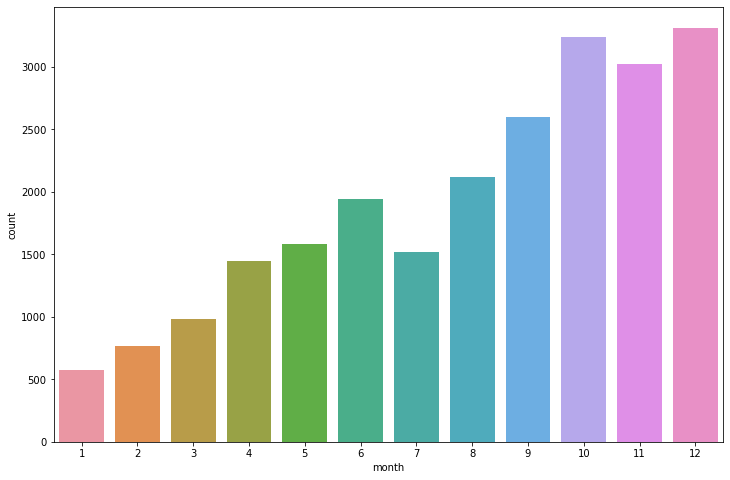

In [129]:
plt.figure(figsize=(12,8))
sns.countplot(data=taxi, x='month')

Step 14 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117899/'>link</a>
<br>⭐️Задание со звёздочкой!⭐️

А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 

sns.countplot(data['column'], order=['One', 'Two', 'Three'])

Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме. 

In [112]:
from datetime import datetime, date, time
days = [date(2001, 1, i).strftime('%A') for i in range(1,8)]
print(days)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


<AxesSubplot:xlabel='weekday', ylabel='count'>

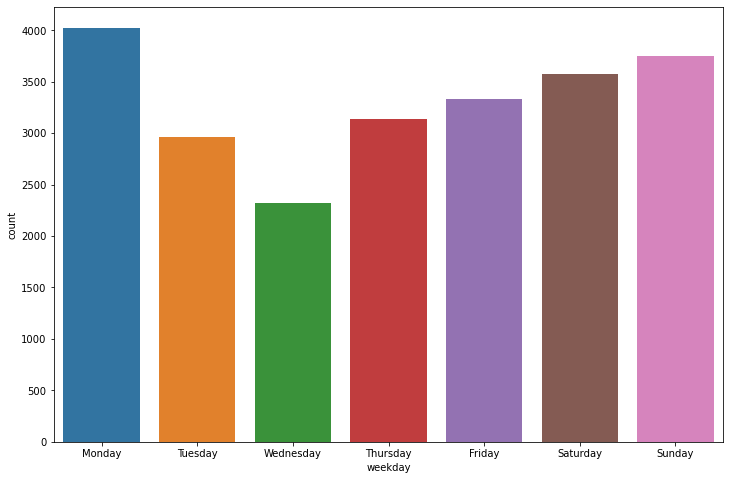

In [128]:
plt.figure(figsize=(12,8))
sns.countplot(data=taxi, x='weekday', order=days)

Step 15 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9041/26525/117900/'>link</a>
<br>⭐️Задание со звёздочкой!⭐️

Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

<br>DAU (daily active users) – число уникальных пользователей за день
<br>WAU (weekly active users) – число уникальных пользователей за неделю
<br>MAU (monthly active users) – число уникальных пользователей за месяц
<br>Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения. 

In [124]:
mau_df = taxi.groupby(by='month', as_index=False) \
    .agg({'user_id':pd.Series.nunique}) \
    .rename(columns={'user_id':'mau'}) \
    .sort_values('mau', ascending=False)

mau_df

,month,mau
11,12,569
10,11,504
9,10,437
8,9,416
7,8,377
6,7,318
5,6,309
4,5,275
3,4,254
2,3,163


<AxesSubplot:xlabel='month'>

<Figure size 864x576 with 0 Axes>

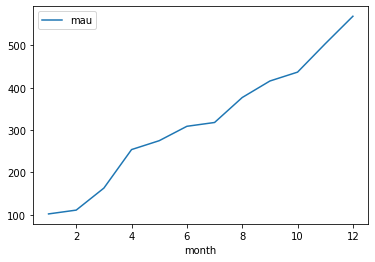

In [126]:
mau_df.plot.line(x='month', y='mau')

<AxesSubplot:xlabel='month', ylabel='mau'>

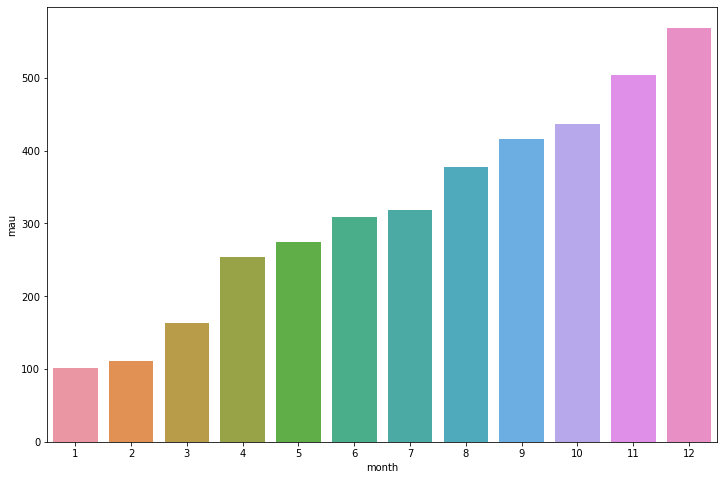

In [134]:
plt.figure(figsize=(12,8))
sns.barplot(data=mau_df, x='month', y='mau')